# Milestone 1


## Data Collection, Exploration, and Preprocessing

### 1- Data Collection

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv(r"C:\Users\start\Downloads\healthcare_stroke_dataset.csv")

In [6]:
df.head()

,id,date,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,12/30/2020,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,8/18/2020,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,3/5/2020,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,7/8/2020,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,6/5/2020,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### 2- Data Exploration

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   date               5110 non-null   object 
 2   gender             5110 non-null   object 
 3   age                5110 non-null   float64
 4   hypertension       5110 non-null   int64  
 5   heart_disease      5110 non-null   int64  
 6   ever_married       5110 non-null   object 
 7   work_type          5110 non-null   object 
 8   Residence_type     5110 non-null   object 
 9   avg_glucose_level  5110 non-null   float64
 10  bmi                4909 non-null   float64
 11  smoking_status     5110 non-null   object 
 12  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(6)
memory usage: 519.1+ KB


In [9]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [10]:
df.columns

Index(['id', 'date', 'gender', 'age', 'hypertension', 'heart_disease',
       'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level',
       'bmi', 'smoking_status', 'stroke'],
      dtype='object')

In [11]:
df.duplicated().sum()

0

In [12]:
df.isnull().sum()

id                     0
date                   0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

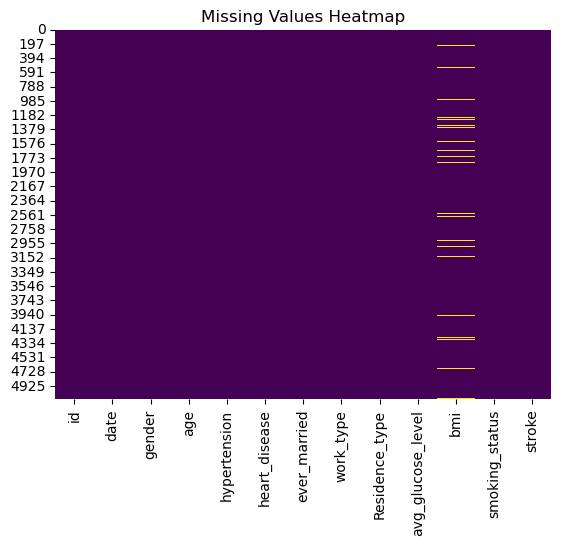

In [13]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

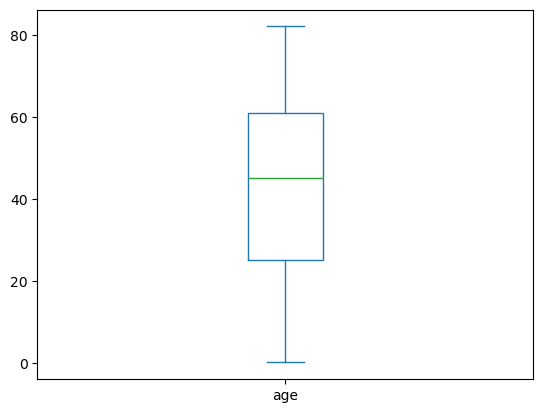

In [14]:
df['age'].plot(kind='box')
plt.show()

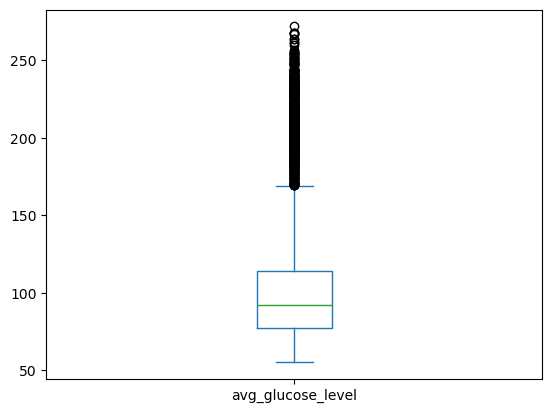

In [15]:
df['avg_glucose_level'].plot(kind='box')
plt.show()

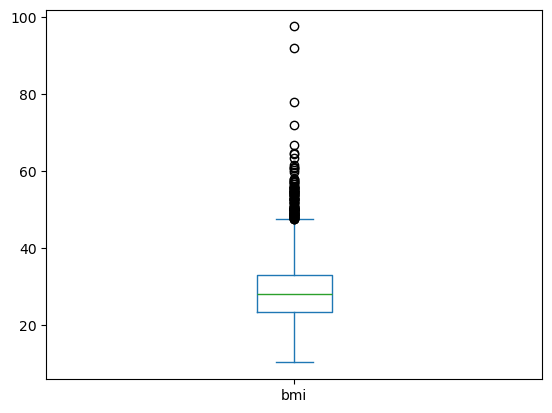

In [16]:
df['bmi'].plot(kind='box')
plt.show()

### 3- Data Preprocessing

In [18]:
df.shape

(5110, 13)

In [19]:
missing_values= df.isnull().sum() 
missing_values

id                     0
date                   0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [20]:
missing_values / df.shape[0] 

id                   0.000000
date                 0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  0.039335
smoking_status       0.000000
stroke               0.000000
dtype: float64

In [21]:
df['bmi'].median()

28.1

In [22]:
df['bmi'] = df['bmi'].fillna(df['bmi'].median())

In [23]:
df['smoking_status'] = df['smoking_status'].replace('-', 'unknown')

In [24]:
df.isnull().sum()

id                   0
date                 0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

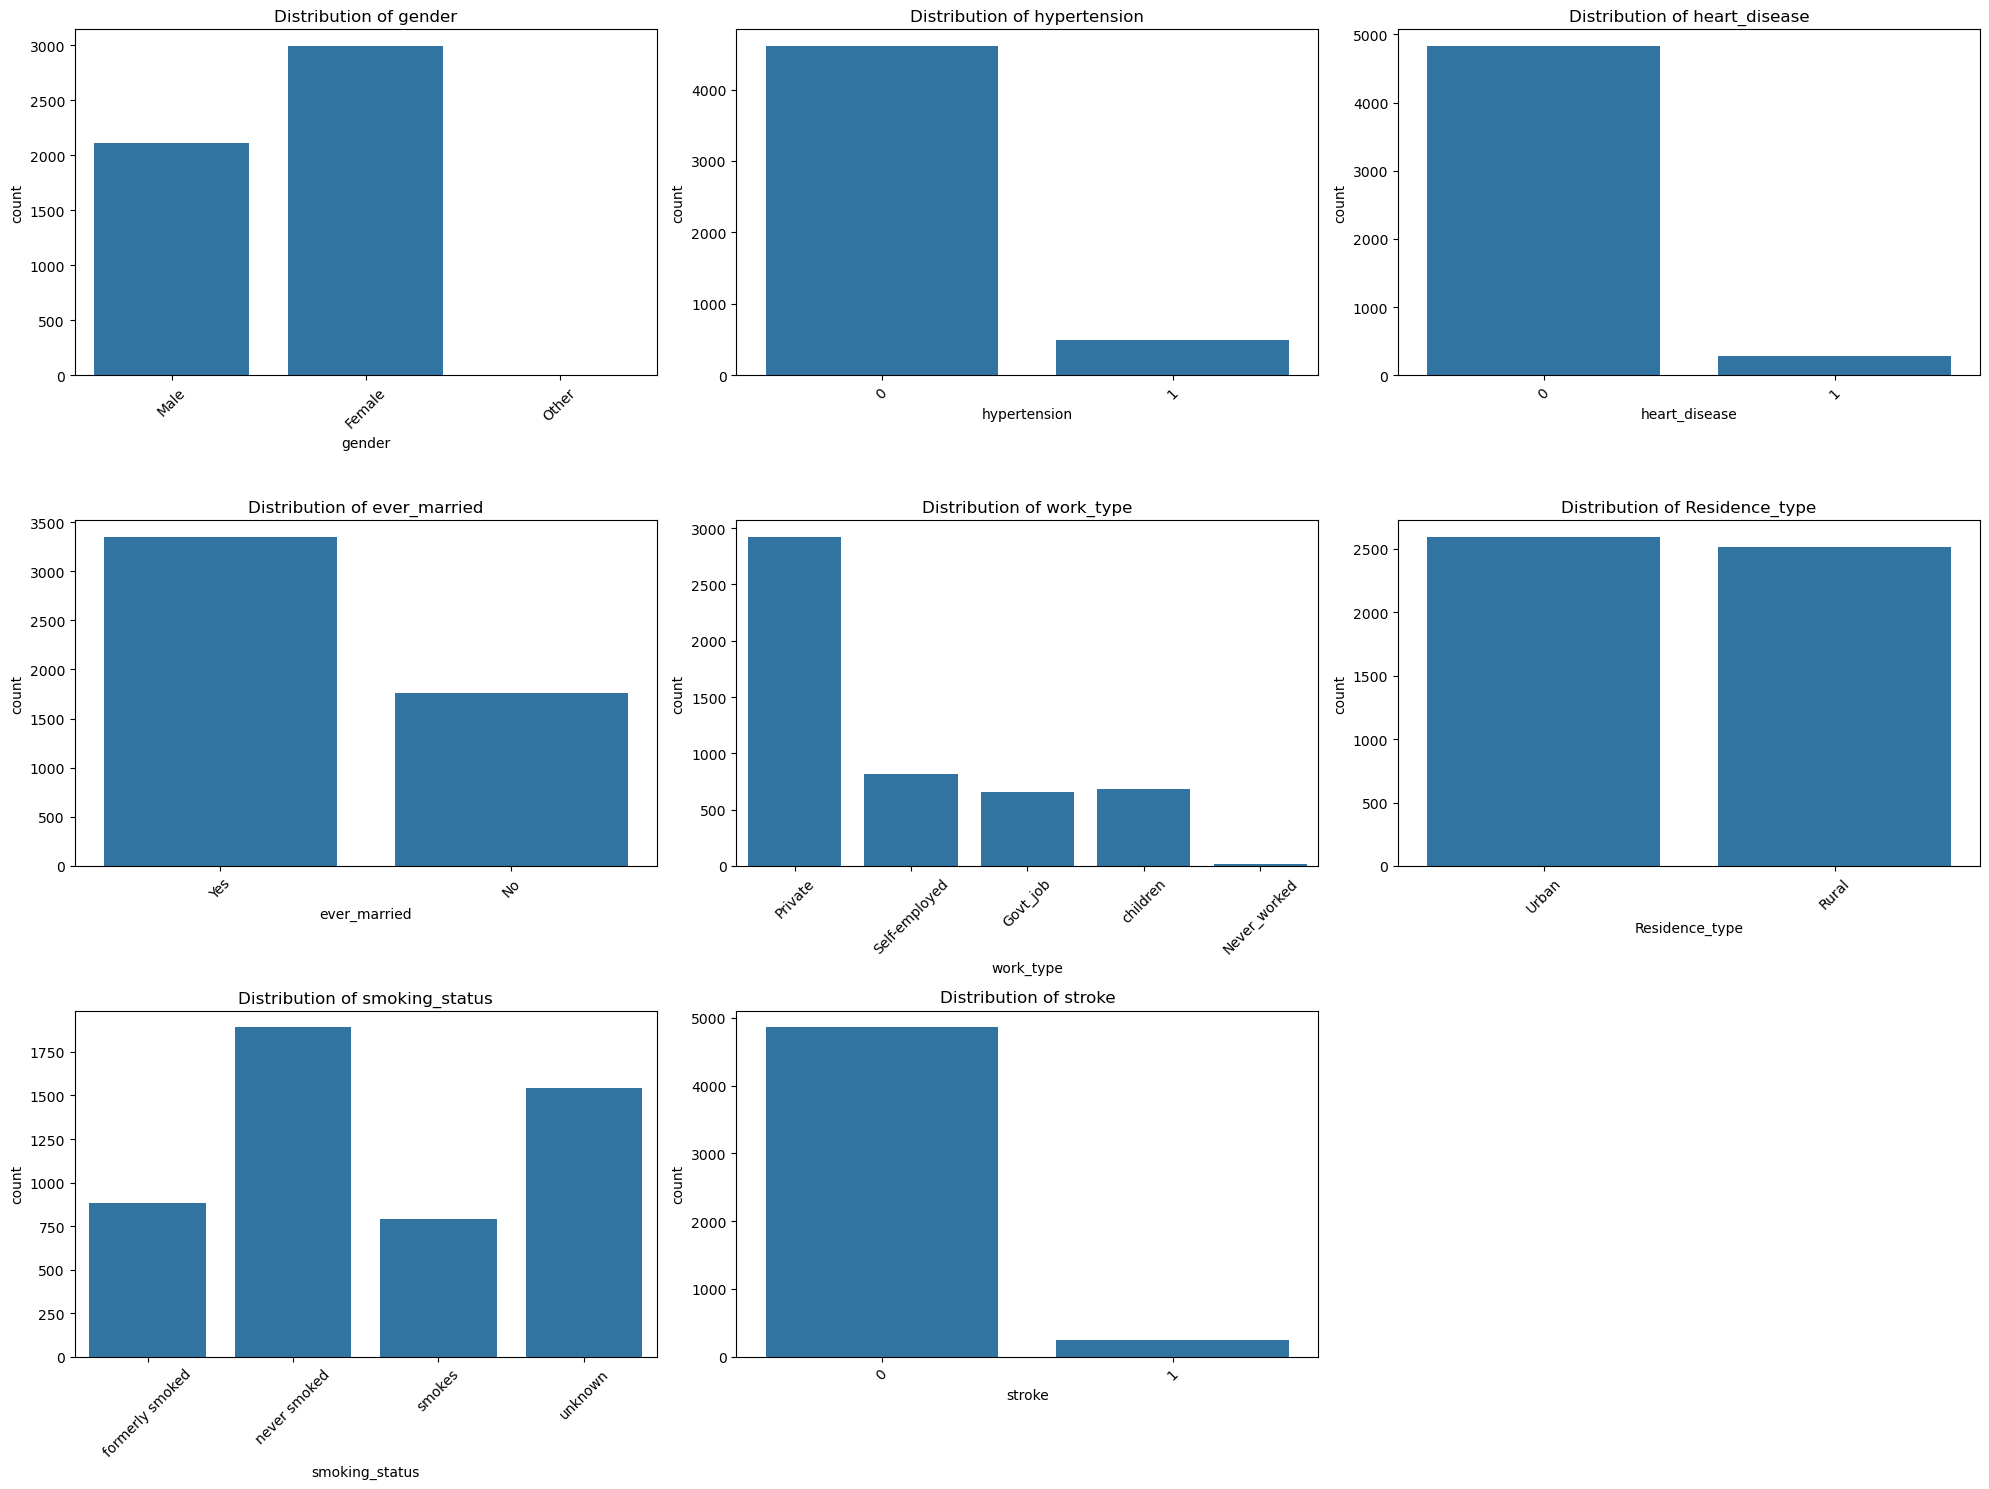

In [26]:
cat_cols = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 
            'Residence_type', 'smoking_status', 'stroke']
plt.figure(figsize=(20, 15))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [29]:
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [31]:
binary_cols = ['hypertension', 'heart_disease', 'stroke']
for col in binary_cols:
    df_encoded[col] = df_encoded[col].astype(int)

In [33]:
display(df_encoded.head())

,id,date,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_never smoked,smoking_status_smokes,smoking_status_unknown
0,9046,12/30/2020,67.0,0,1,228.69,36.6,1,True,False,True,False,True,False,False,True,False,False,False
1,51676,8/18/2020,61.0,0,0,202.21,28.1,1,False,False,True,False,False,True,False,False,True,False,False
2,31112,3/5/2020,80.0,0,1,105.92,32.5,1,True,False,True,False,True,False,False,False,True,False,False
3,60182,7/8/2020,49.0,0,0,171.23,34.4,1,False,False,True,False,True,False,False,True,False,True,False
4,1665,6/5/2020,79.0,1,0,174.12,24.0,1,False,False,True,False,False,True,False,False,True,False,False


In [35]:
final_df = df_encoded.drop(['id', 'date'], axis=1)

In [37]:
final_df.to_csv('preprocessed_stroke_data.csv', index=False)